In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('performance.csv')

In [53]:
dataset= df.loc[(df['MemoryJob1']>100) & (df['InMapper']==True),['TimeJob1','TimeJob2']] #loc serve per specificare sia righe che colonne

In [54]:
df

,Weight(MB),TotalTime,TimeJob1,TimeJob2,Reducers,InMapper,MemoryJob1,MemoryJob2,input_splits
0,0.271,50.994279,29.300819,21.693461,1,True,422215680,447913984,1
1,0.271,57.194307,19.087620,38.106687,3,True,448311296,765194240,1
2,0.271,54.484398,25.652705,28.831692,5,True,442605568,1136627712,1
3,4.900,44.832930,19.221814,25.611115,1,True,444456960,451096576,1
4,4.900,45.681608,19.061776,26.619832,3,True,448372736,795701248,1
5,4.900,60.231218,19.105508,41.125709,5,True,446214144,1093210112,1
6,147.000,149.160227,25.856635,123.303593,1,True,723578880,729169920,2
7,147.000,146.043992,19.233366,126.810625,3,True,720273408,1067864064,2
8,147.000,143.005184,19.230167,123.775017,5,True,724463616,1411596288,4
9,489.000,269.870091,25.284933,244.585158,1,True,1273729024,1285423104,4


    Weight(MB)   TotalTime
1        0.271   57.194307
4        4.900   45.681608
7      147.000  146.043992
10     489.000  174.022694
13    2370.000  494.663360
19    1190.000  373.546290
20     245.000  145.189202


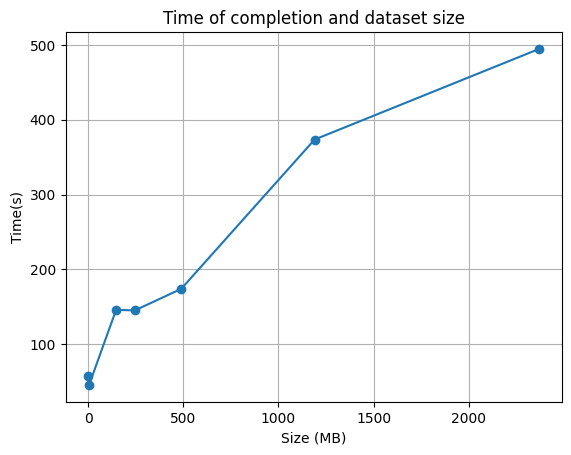

In [55]:
ds1 = df.loc[(df['InMapper']==True)&(df['Reducers']==3),['Weight(MB)','TotalTime']]

print(ds1)
ds1 = ds1.sort_values(by='Weight(MB)')
plt.plot(ds1['Weight(MB)'],ds1['TotalTime'],'o-')

plt.xlabel("Size (MB)")
plt.ylabel("Time(s)")
plt.grid()
plt.title("Time of completion and dataset size")
#plt.xlim(0,10)
#plt.ylim(0,10)

plt.show()





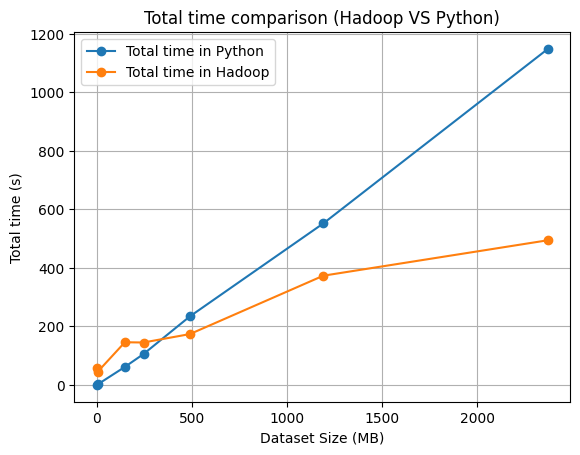

In [56]:
ds2 = df.loc[(df['InMapper']==True)&(df['Reducers']==3),['Weight(MB)','TotalTime']]
ds2 = ds2.sort_values(by='Weight(MB)') 

new_values = [0.18545740001718514, 2.2961188000044785, 61.756962600018596, 105.76355989999138, 234.6056641000032, 552.2882680000039, 1148.6779703999928]
df_new = ds2

num = 0
for key, value in df_new.iterrows() :
    df_new.loc[key, 'TotalTime'] = new_values[num]
    num = num +1

plt.plot(df_new['Weight(MB)'],df_new['TotalTime'],'o-',label = 'Total time in Python')

ds1 = df.loc[(df['InMapper']==True)&(df['Reducers']==3),['Weight(MB)','TotalTime']]
ds1 = ds1.sort_values(by='Weight(MB)')

plt.plot(ds1['Weight(MB)'],ds1['TotalTime'],'o-',label='Total time in Hadoop')

plt.legend()
plt.xlabel("Dataset Size (MB)")
plt.ylabel("Total time (s)")
plt.grid()
plt.title("Total time comparison (Hadoop VS Python)")

#plt.xlim(0,10)
#plt.ylim(0,10)

plt.show()

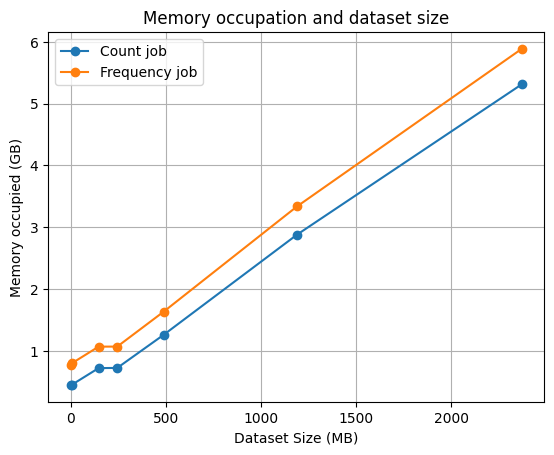

In [57]:
ds1 = df.loc[(df['InMapper']==True)&(df['Reducers']==3),['Weight(MB)','MemoryJob1']]
ds1 = ds1.sort_values(by='Weight(MB)')
ds1['MemoryJob1'] = ds1['MemoryJob1'].div(1000000000)

plt.plot(ds1['Weight(MB)'],ds1['MemoryJob1'],'o-',label='Count job')

ds2 = df.loc[(df['InMapper']==True)&(df['Reducers']==3),['Weight(MB)','MemoryJob2']]
ds2 = ds2.sort_values(by='Weight(MB)')
ds2['MemoryJob2'] = ds2['MemoryJob2'].div(1000000000)

plt.plot(ds2['Weight(MB)'],ds2['MemoryJob2'],'o-',label = 'Frequency job')

plt.legend()
plt.xlabel("Dataset Size (MB)")
plt.ylabel("Memory occupied (GB)")
plt.grid()
plt.title("Memory occupation and dataset size")

#plt.xlim(0,10)
#plt.ylim(0,10)

plt.show()

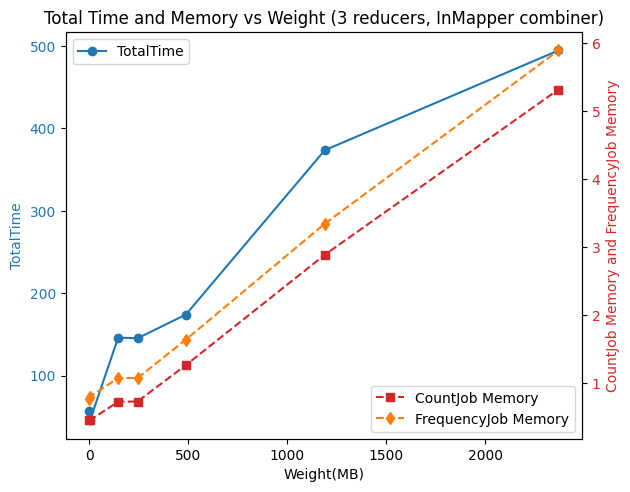

In [58]:
df1 = df[(df['Reducers'] == 3) & (df['InMapper'] == True)]
df1= df1.sort_values(by='Weight(MB)')

fig, ax1 = plt.subplots()

ax1.set_xlabel('Weight(MB)')
ax1.set_ylabel('TotalTime', color='tab:blue')
ax1.plot(df1['Weight(MB)'], df1['TotalTime'], 'o-', color='tab:blue', label='TotalTime')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('CountJob Memory and FrequencyJob Memory', color='tab:red')
df1['MemoryJob1'] = df1['MemoryJob1'].div(1000000000)
df1['MemoryJob2'] = df1['MemoryJob2'].div(1000000000)
ax2.plot(df1['Weight(MB)'], df1['MemoryJob1'], 's--', color='tab:red', label='CountJob Memory')
ax2.plot(df1['Weight(MB)'], df1['MemoryJob2'], 'd--', color='tab:orange', label='FrequencyJob Memory')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.title('Total Time and Memory vs Weight (3 reducers, InMapper combiner)')
plt.show()

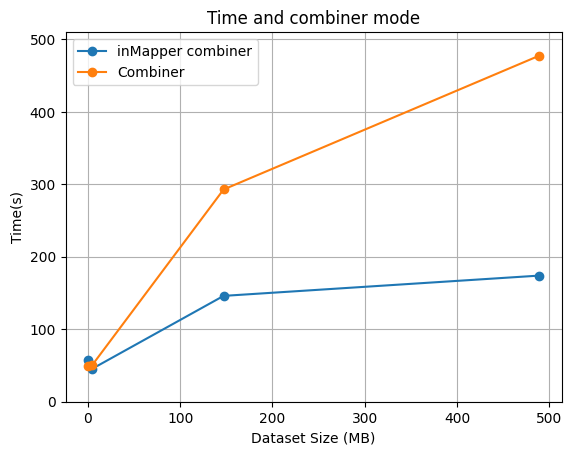

In [59]:
ds1 = df.loc[(df['InMapper']==True)&(df['Reducers']==3)&(df['Weight(MB)'].isin([0.271,4.9,147,489])),['Weight(MB)','TotalTime']]
ds1 = ds1.sort_values(by='Weight(MB)')

plt.plot(ds1['Weight(MB)'],ds1['TotalTime'],'o-',label='inMapper combiner')


ds2 = df.loc[(df['InMapper']==False)&(df['Reducers']==3)&(df['Weight(MB)'].isin([0.271,4.9,147,489])),['Weight(MB)','TotalTime']]
ds2 = ds2.sort_values(by='Weight(MB)')

plt.plot(ds2['Weight(MB)'],ds2['TotalTime'],'o-',label='Combiner')

plt.legend()
plt.xlabel("Dataset Size (MB)")
plt.ylabel("Time(s)")
plt.grid()
plt.title("Time and combiner mode")
#plt.xlim(0,10)
plt.ylim(0,510)

plt.show()

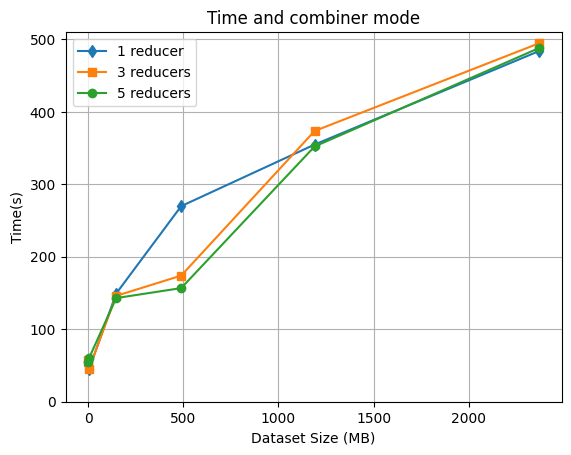

In [60]:
ds1 = df.loc[(df['InMapper']==True)&(df['Reducers']==1)&(df['Weight(MB)'].isin([0.271,4.9,147,489,2370,1190])),['Weight(MB)','TotalTime']]
ds1 = ds1.sort_values(by='Weight(MB)')

plt.plot(ds1['Weight(MB)'],ds1['TotalTime'],'d-',label='1 reducer')


ds2 = df.loc[(df['InMapper']==True)&(df['Reducers']==3)&(df['Weight(MB)'].isin([0.271,4.9,147,489,2370,1190])),['Weight(MB)','TotalTime']]
ds2 = ds2.sort_values(by='Weight(MB)')

plt.plot(ds2['Weight(MB)'],ds2['TotalTime'],'s-',label='3 reducers')

ds3 = df.loc[(df['InMapper']==True)&(df['Reducers']==5)&(df['Weight(MB)'].isin([0.271,4.9,147,489,2370,1190])),['Weight(MB)','TotalTime']]
ds3 = ds3.sort_values(by='Weight(MB)')

plt.plot(ds3['Weight(MB)'],ds3['TotalTime'],'o-',label='5 reducers')

plt.legend()
plt.xlabel("Dataset Size (MB)")
plt.ylabel("Time(s)")
plt.grid()
plt.title("Time and number of reducers")
#plt.xlim(0,10)
plt.ylim(0,510)

plt.show()

In [61]:
ds1

,Weight(MB),TotalTime
0,0.271,50.994279
3,4.900,44.832930
6,147.000,149.160227
9,489.000,269.870091
21,1190.000,354.830979
12,2370.000,483.861952


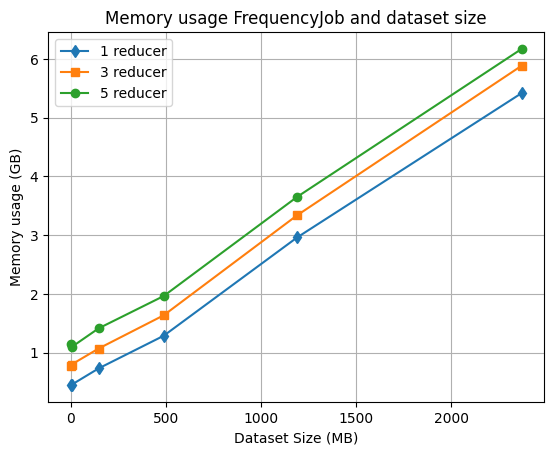

In [62]:
ds1 = df.loc[(df['InMapper']==True)&(df['Reducers']==1)&(df['Weight(MB)'].isin([0.271,4.9,147,489,2370,1190])),['Weight(MB)','MemoryJob2']]
ds1 = ds1.sort_values(by='Weight(MB)')
ds1['MemoryJob2'] = ds1['MemoryJob2'].div(1000000000)

plt.plot(ds1['Weight(MB)'],ds1['MemoryJob2'],'d-',label='1 reducer')


ds2 = df.loc[(df['InMapper']==True)&(df['Reducers']==3)&(df['Weight(MB)'].isin([0.271,4.9,147,489,2370,1190])),['Weight(MB)','MemoryJob2']]
ds2 = ds2.sort_values(by='Weight(MB)')
ds2['MemoryJob2'] = ds2['MemoryJob2'].div(1000000000)

plt.plot(ds2['Weight(MB)'],ds2['MemoryJob2'],'s-',label='3 reducers')

ds3 = df.loc[(df['InMapper']==True)&(df['Reducers']==5)&(df['Weight(MB)'].isin([0.271,4.9,147,489,2370,1190])),['Weight(MB)','MemoryJob2']]
ds3 = ds3.sort_values(by='Weight(MB)')
ds3['MemoryJob2'] = ds3['MemoryJob2'].div(1000000000)

plt.plot(ds3['Weight(MB)'],ds3['MemoryJob2'],'o-',label='5 reducers')

plt.legend()
plt.xlabel("Dataset Size (MB)")
plt.ylabel("Memory usage (GB)")
plt.grid()
plt.title("Memory usage of FrequencyJob and dataset size")
#plt.xlim(0,10)
#plt.ylim(0,6.4e9)

plt.show()

In [41]:
data = pd.read_csv('letters.csv')


                  american-english  british-english   italian  portoguese  \
american-english          1.000000         0.999479  0.897838    0.865008   
british-english           0.999479         1.000000  0.896783    0.858384   
italian                   0.897838         0.896783  1.000000    0.904521   
portoguese                0.865008         0.858384  0.904521    1.000000   
spanish                   0.894302         0.889801  0.930761    0.970626   

                   spanish  
american-english  0.894302  
british-english   0.889801  
italian           0.930761  
portoguese        0.970626  
spanish           1.000000  


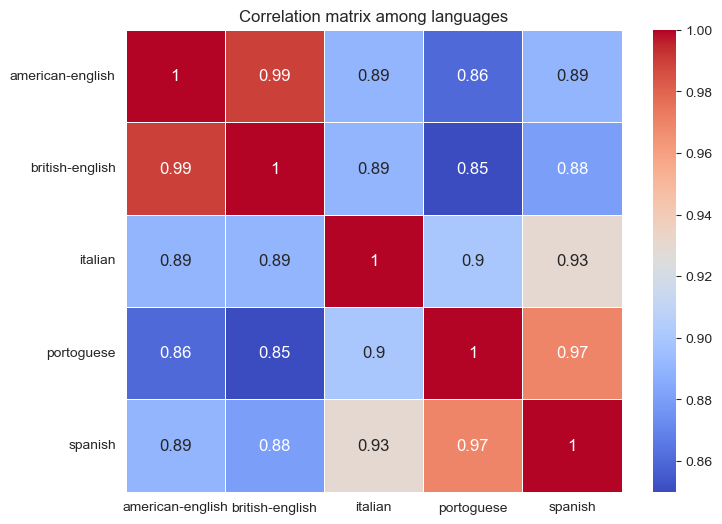

In [31]:
correlation_matrix = data.iloc[:, 1:].corr()
print(correlation_matrix) 

correlation_matrix_truncated = (np.floor(correlation_matrix * 100) / 100).astype('float64')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_truncated, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 12})
plt.title('Correlation matrix among languages')
plt.show()

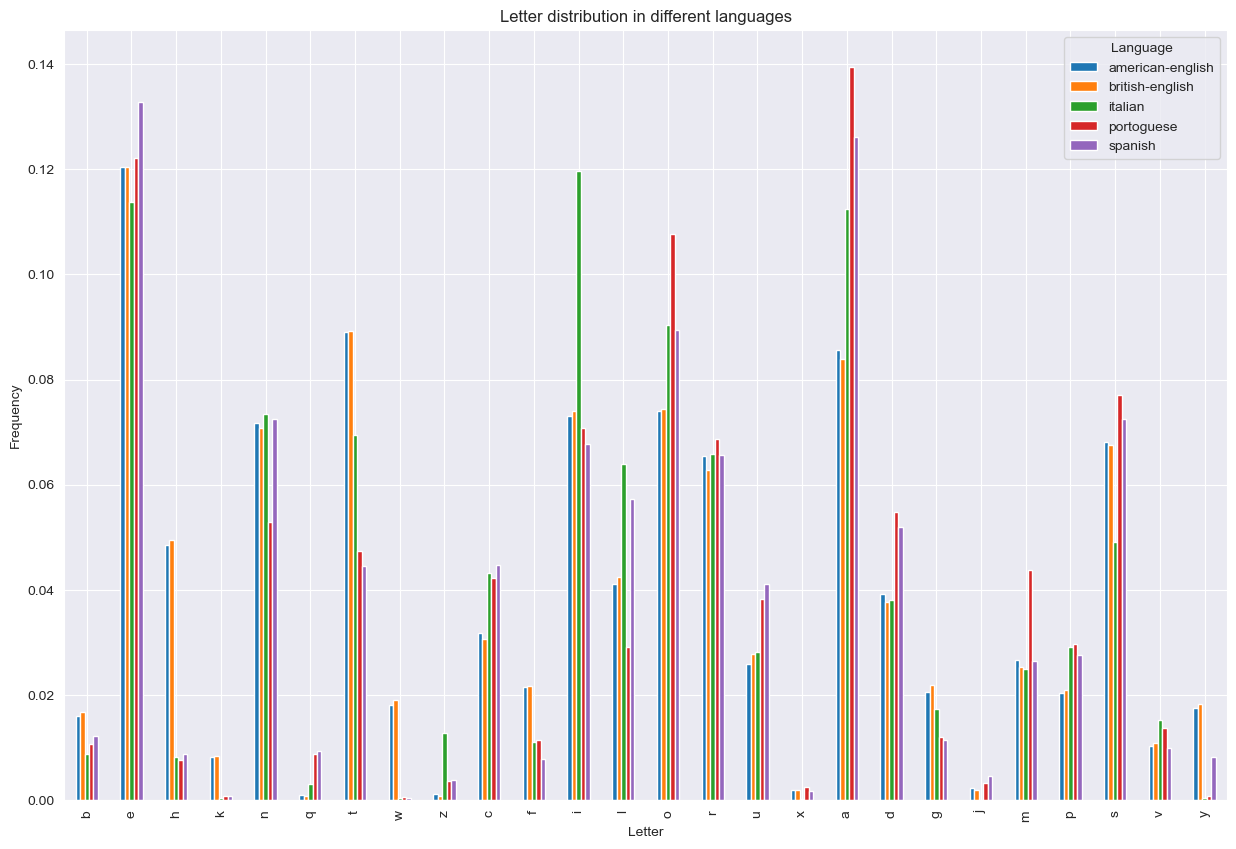

In [32]:
data.set_index('letter', inplace=True)
data.plot(kind='bar', figsize=(15, 10))
plt.title('Letter distribution in different languages')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.legend(title='Language')
plt.show()

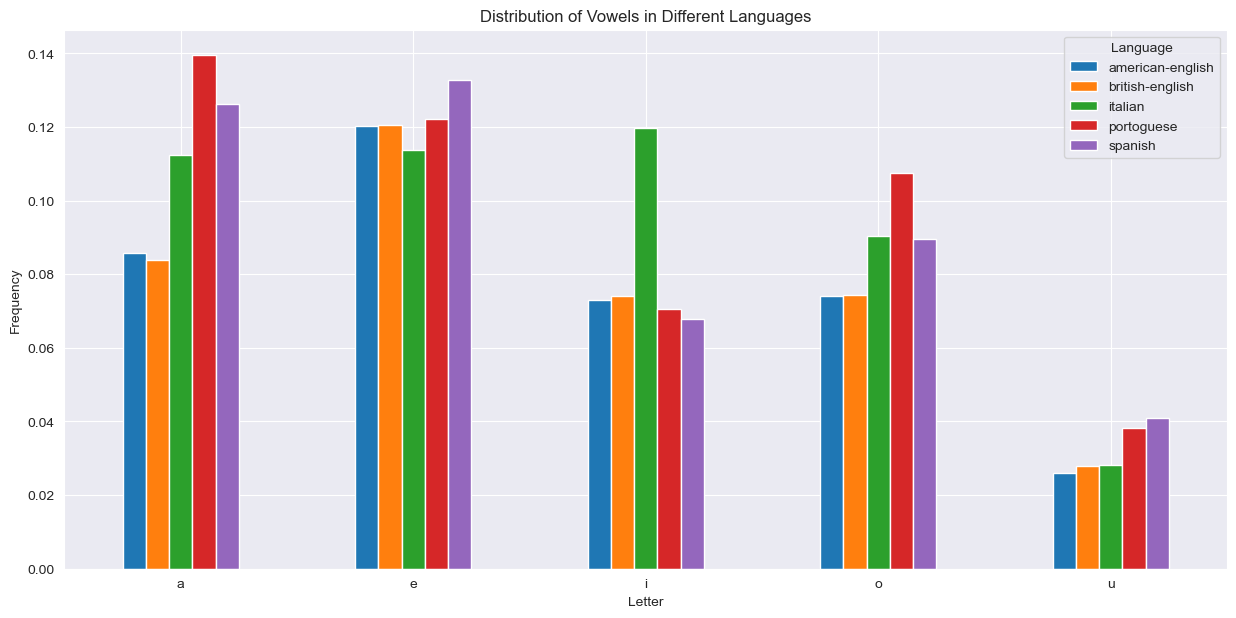

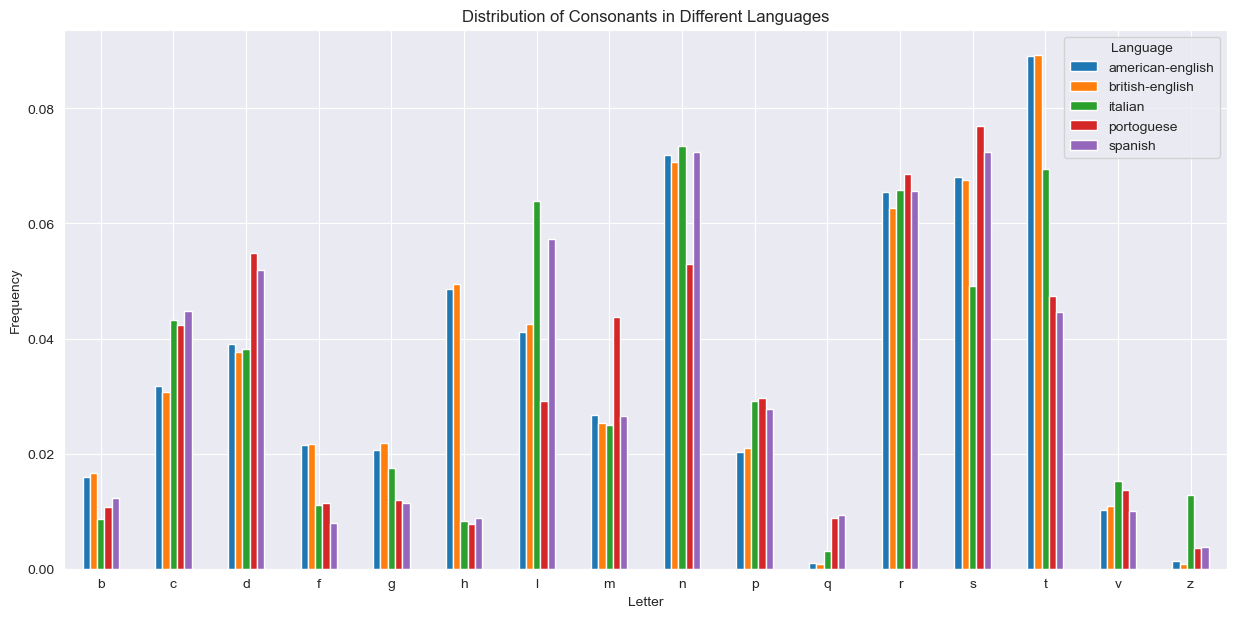

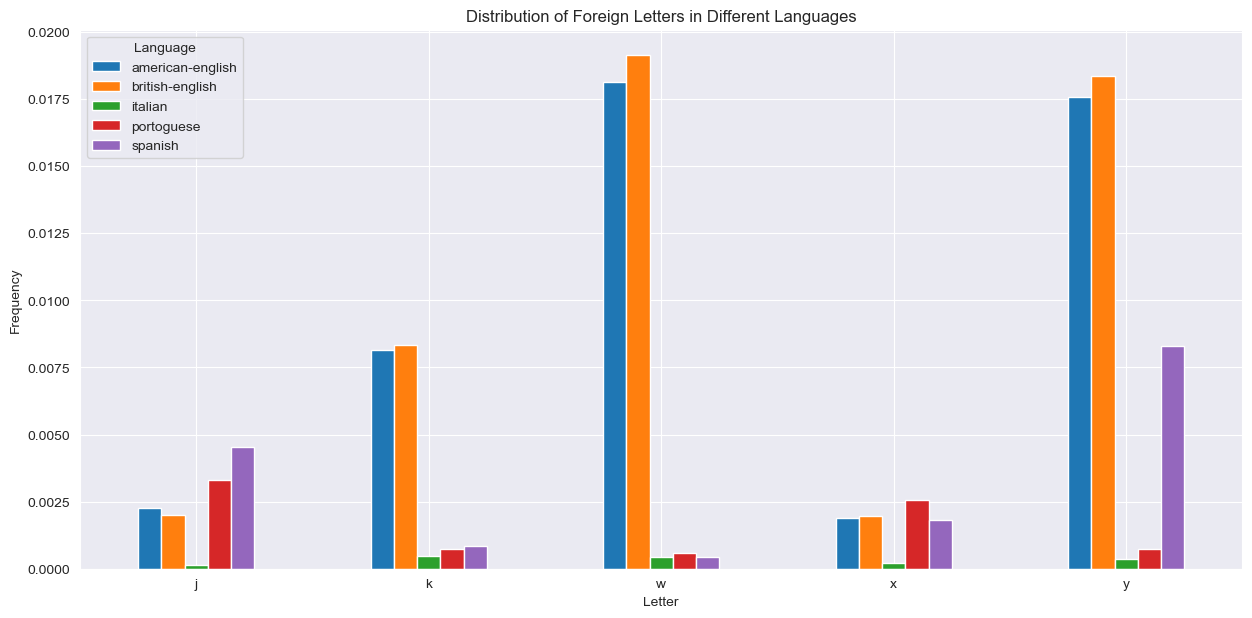

In [44]:
#data.set_index('letter', inplace=True)

data = data.sort_values(by='letter')

if data.index.name == 'letter':
    data.reset_index(inplace=True)

vowels = data[data['letter'].isin(['a', 'e', 'i', 'o', 'u'])]
consonants = data[data['letter'].isin(['b', 'c', 'd', 'f', 'g', 'h', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'z'])]
foreign_letters = data[data['letter'].isin(['j','k', 'w', 'x','y'])]

vowels.set_index('letter', inplace=True)
consonants.set_index('letter', inplace=True)
foreign_letters.set_index('letter', inplace=True)
def plot_distribution(data, title):
    ax = data.plot(kind='bar', figsize=(15, 7), rot=0)
    ax.set_title(title)
    ax.set_xlabel('Letter')
    ax.set_ylabel('Frequency')
    ax.legend(title='Language')
    plt.show()

plot_distribution(vowels, 'Distribution of Vowels in Different Languages')

plot_distribution(consonants, 'Distribution of Consonants in Different Languages')

plot_distribution(foreign_letters, 'Distribution of Foreign Letters in Different Languages')

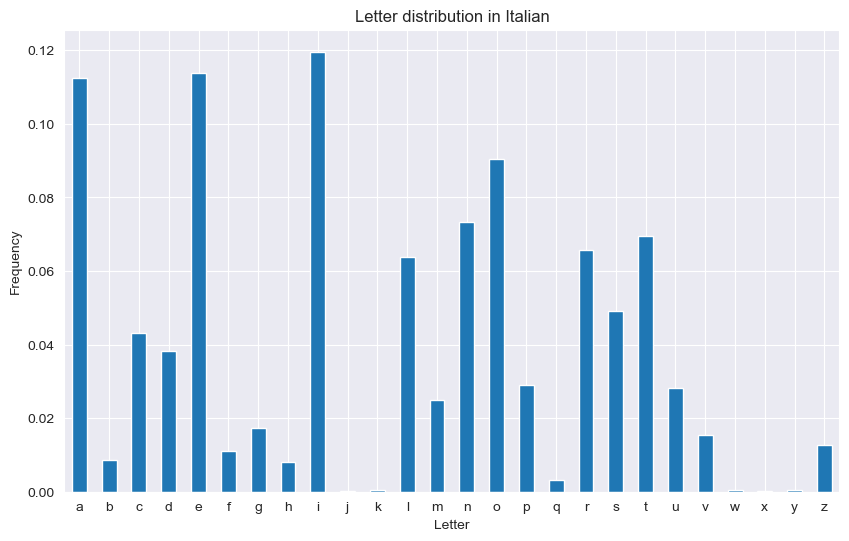

In [53]:
data = pd.read_csv('letters.csv')

data = data.sort_values(by='letter')
data.set_index('letter', inplace=True)
data['italian'].plot(kind='bar', figsize=(10, 6))

plt.title('Letter distribution in Italian')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()

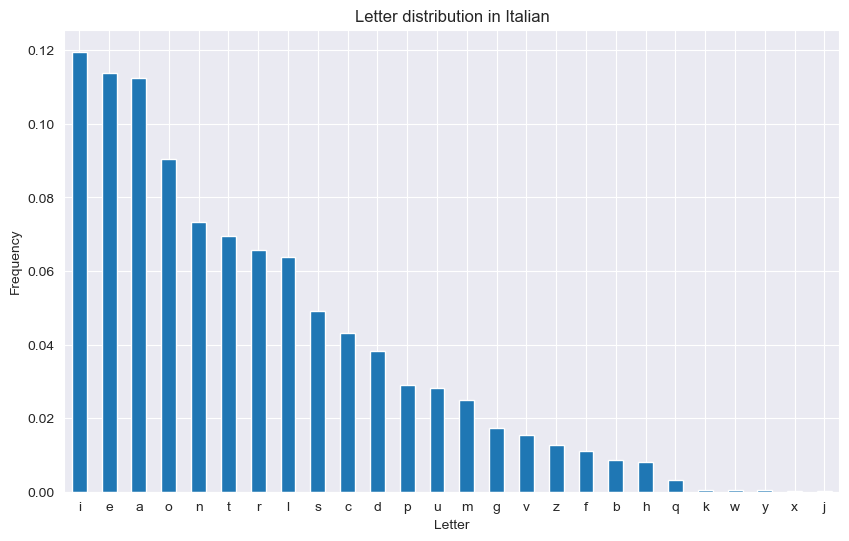

In [55]:
data = pd.read_csv('letters.csv')

data = data.sort_values(by='italian', ascending=False)
data.set_index('letter', inplace=True)
data['italian'].plot(kind='bar', figsize=(10, 6))


plt.title('Letter distribution in Italian')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()